In [356]:
%load_ext autoreload
%autoreload 2
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import data_strings
import plotting.plot_octagon as plot_octagon
import plotting.plot_probability_chose_wall as plot_probability_chose_wall
import plotting.plot_trajectory as plot_trajectory
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import plotting.plot_probability_chose_wall as plot_probability_chose_wall
import data_extraction.trial_list_filters as trial_list_filters
from scipy.stats import norm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Generic starting point for work on session data

In [ ]:
single_session_index = -1

In [382]:
data_folder = data_strings.DATA_FOLDER
json_filename_social = data_strings.JSON_FILENAMES_SOCIAL[single_session_index]
json_filenames_solo = data_strings.JSON_FILENAMES_SOLO[single_session_index*4 : single_session_index*4+4]

In [383]:
json_filenames_solo

['seventh_experiments_241113\\2024-11-13_14-12-43_NasiaFirstSolo.json',
 'seventh_experiments_241113\\2024-11-13_14-37-06_NasiaSecondSolo.json',
 'seventh_experiments_241113\\2024-11-13_14-12-41_RyanFirstSolo.json',
 'seventh_experiments_241113\\2024-11-13_14-37-20_RyanSecondSolo.json']

In [384]:
dfs_solo, trials_lists_solo = prepare_data.prepare_data(data_folder, json_filenames_solo, combine=False)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\seventh_experiments_241113\2024-11-13_14-12-43_NasiaFirstSolo.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\seventh_experiments_241113\2024-11-13_14-37-06_NasiaSecondSolo.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\seventh_experiments_241113\2024-11-13_14-12-41_RyanFirstSolo.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\seventh_experiments_241113\2024-11-13_14-37-20_RyanSecondSolo.json
Loading complete.
Preprocessing complete.


In [385]:
df_social, trials_list_social = prepare_data.prepare_data(data_folder, json_filename_social, combine=False)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\seventh_experiments_241113\2024-11-13_14-18-54_NasiaRyanSocial.json
Loading complete.
Preprocessing complete.


### plot session trajectories

In [386]:
titles=False

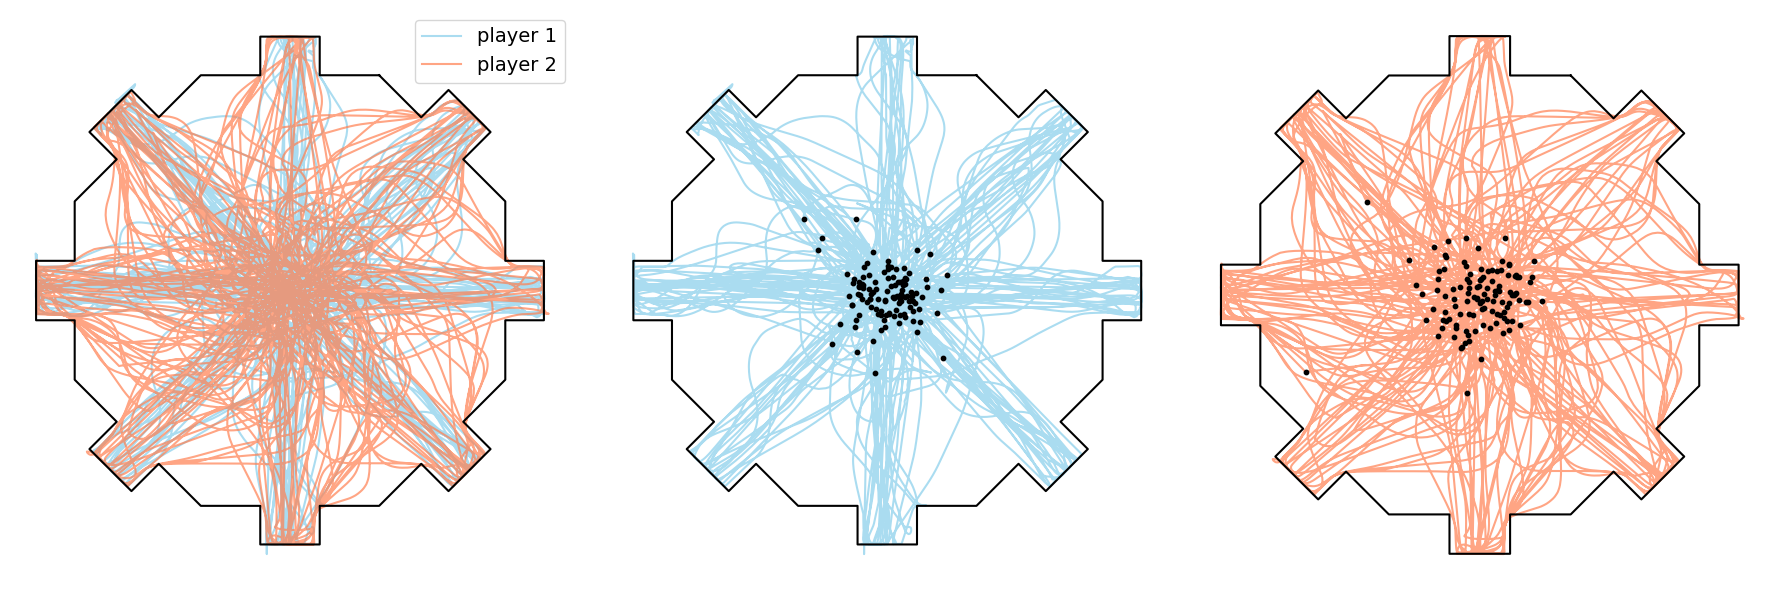

In [388]:
# plot the full session trajectory for player 0, player 1, and combined

fig, axs = plt.subplots(1,3,figsize=(15*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], df_social, titles=titles)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], df_social, chosen_player=0, titles=titles)
axs[1] = plot_trajectory.mark_session_slice_onsets(axs[1], df_social, chosen_player=0, s=10)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

axs[2] = plot_trajectory.plot_session_trajectory(axs[2], df_social, chosen_player=1, titles=titles)
axs[2] = plot_octagon.plot_octagon(axs[2])
axs[2] = plot_trajectory.mark_session_slice_onsets(axs[2], df_social, chosen_player=1, s=10)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

axs[0].title.set_size(20)
axs[1].title.set_size(20)
axs[2].title.set_size(20)



axs[0].legend(prop={'size': 14})

plt.tight_layout()

plt.show()


### plot solo trajectories

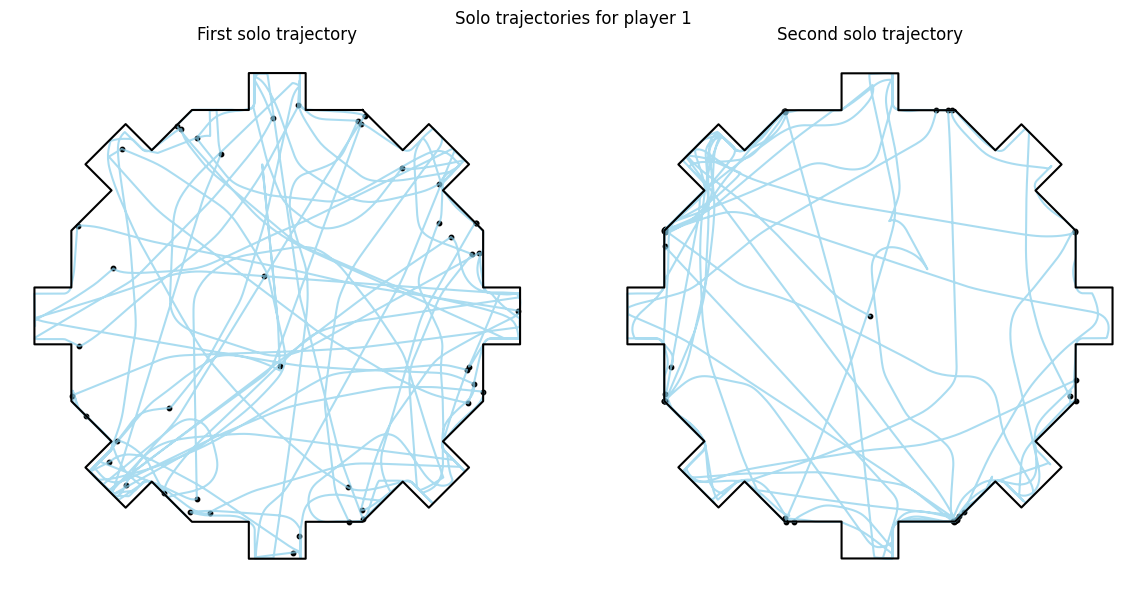

In [254]:
chosen_player = 0

fig, axs = plt.subplots(1,2,figsize=(10*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], dfs_solo[0], alpha=0.7)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[0], dfs_solo[0], chosen_player=chosen_player)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])
axs[0].set_title("First solo trajectory")

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], dfs_solo[1], alpha=0.7)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[1], dfs_solo[1], chosen_player=chosen_player)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
axs[1].set_title("Second solo trajectory")
plt.suptitle(f"Solo trajectories for player {chosen_player+1}")
plt.tight_layout()

plt.show()


In [190]:
chosen_player*2

0

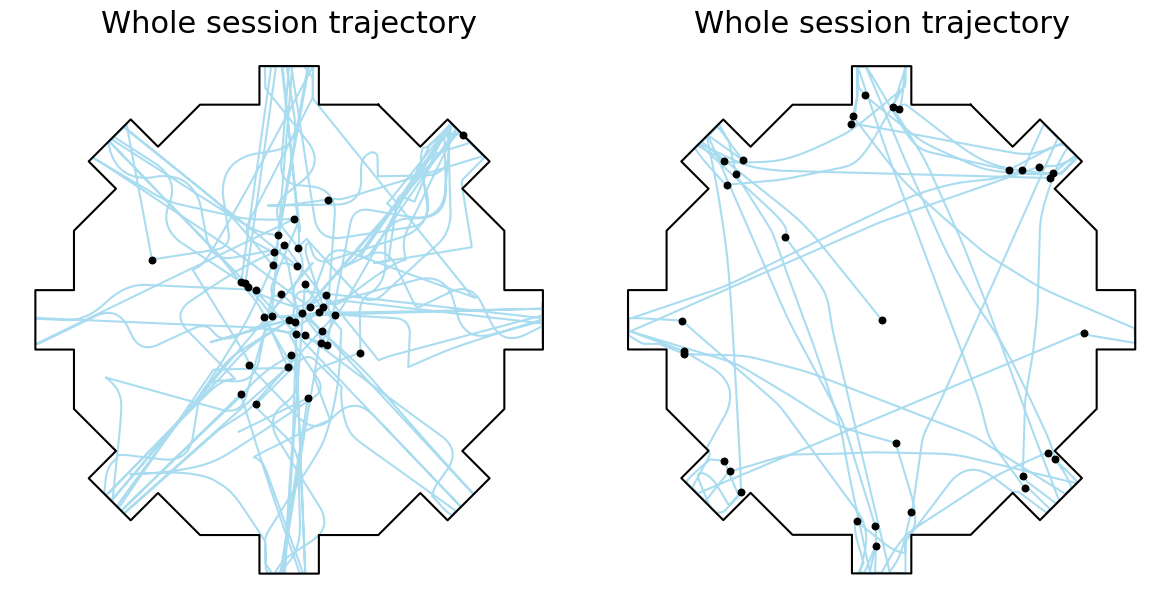

In [262]:
chosen_player = 1

fig, axs = plt.subplots(1,2,figsize=(10*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], dfs_solo[chosen_player*2], alpha=0.7, titles=True)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[0], dfs_solo[chosen_player*2], chosen_player=0, s=22)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])
# axs[0].set_title("First Solo session trajectory")

axs[0].title.set_size(22)

# axs[0].set_title("First solo trajectory", fontsize=18)

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], dfs_solo[chosen_player*2+1], alpha=0.7, titles=True)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[1], dfs_solo[chosen_player*2+1], chosen_player=0, s=22)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
# axs[1].set_title("Second Solo session trajectory")

axs[1].title.set_size(22)

# axs[1].set_title("Second solo trajectory", fontsize=18)
# plt.suptitle(f"Solo trajectories for player {chosen_player+1}", fontsize=24)
plt.tight_layout()

plt.show()


### plot probability choose high

In [192]:
(probability_choose_high_social_array,
probability_choose_high_solo_array,
probability_choose_high_solo_array_first_session,
probability_choose_high_solo_array_second_session) = plot_probability_chose_wall.get_probability_chose_high_solo_social_all_sessions_df(trials_lists_solo,
                                                                                                                                        [trials_list_social],
                                                                                                                                        wall_sep=None,
                                                                                                                                        trial_type=globals.HIGH_LOW,
                                                                                                                                        cut_solo_trials=5)  

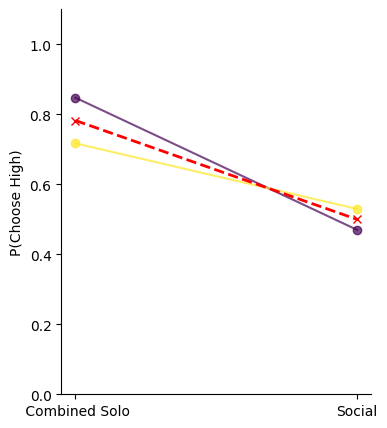

In [193]:
plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array, black_lines=False)

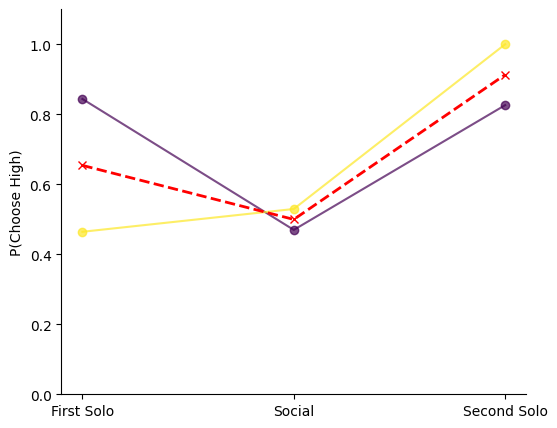

In [194]:
plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array_first_session,
                                                                     probability_choose_high_solo_array_second_session, black_lines=False)

In [195]:
(probability_first_wall_chosen_when_low_array,
  _,
  probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_social([trials_list_social])

(probability_first_wall_chosen_when_high_array,
  _,
  probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_social([trials_list_social], reverse=True)

wall_choice_probabilities = [probability_first_wall_chosen_array, probability_first_wall_chosen_when_low_array, probability_first_wall_chosen_when_high_array] 
wall_choice_labels = ['First Wall Seen', 'First Wall Seen (Low)', 'First Wall Seen (High)']


trial list index: 0
player num: 0
 player wall choice this trial: 1.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 1.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 2.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 2.0
 this_player_this_trial_first_visible_wall_chosen: False
 player wall choice this trial: 4.0
 this_player_this_trial_first_visible_wall_chosen: False
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_t

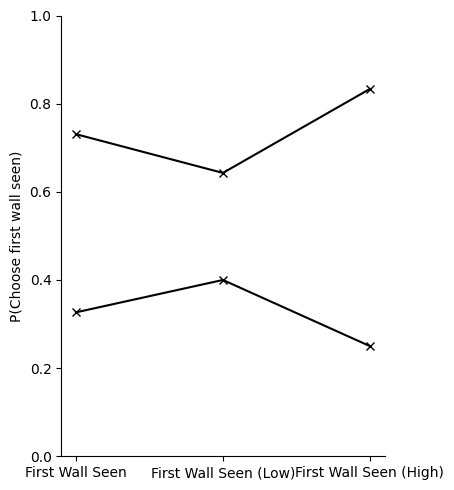

In [196]:
# Plot
plt.figure(figsize=(4, 5))

for i in range(1):
    plt.plot(np.arange(len(wall_choice_labels)), [wall_choice_probabilities[0][i], wall_choice_probabilities[1][i], wall_choice_probabilities[2][i]], color='k', linestyle='-', marker='x')


# plt.title("Probability of Choosing First Wall Seen vs. First Wall Seen (Low)")
plt.ylabel("P(Choose first wall seen)")
plt.xlabel("")
plt.ylim(0.0, 1)  # Set y-axis limits for probabilities
plt.gca().set_aspect(3)
plt.tight_layout()

# Set x-ticks to correspond to categorical labels
plt.xticks(np.arange(len(wall_choice_labels)), wall_choice_labels)

# Remove top and bottom spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


## Upgrade fig5 - KirtanChristopher session

### Plot half-session trajectories

In [269]:
titles=False

In [270]:
social_first_half = df_social[df_social['data.trialNum'] < 60]
social_second_half = df_social[df_social['data.trialNum'] >= 60]

In [271]:
social_first_half['data.trialNum'].tail()

31501    59.0
31502    59.0
31503    59.0
31504    59.0
31505    59.0
Name: data.trialNum, dtype: float64

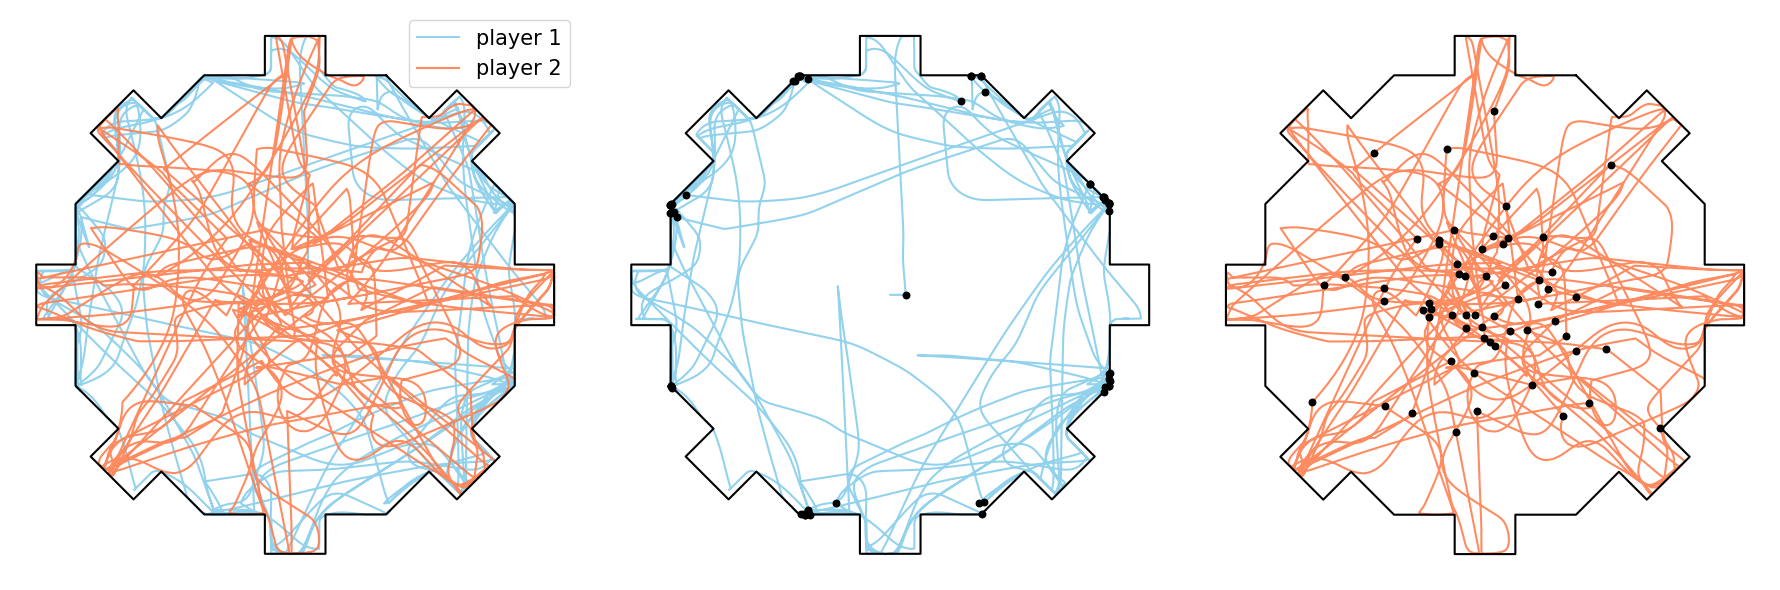

In [272]:
# plot the full session trajectory for player 0, player 1, and combined

fig, axs = plt.subplots(1,3,figsize=(15*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], social_first_half, titles=titles)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], social_first_half, chosen_player=0, titles=titles)
axs[1] = plot_trajectory.mark_session_slice_onsets(axs[1], social_first_half, chosen_player=0, s=22)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

axs[2] = plot_trajectory.plot_session_trajectory(axs[2], social_first_half, chosen_player=1,titles=titles)
axs[2] = plot_octagon.plot_octagon(axs[2])
axs[2] = plot_trajectory.mark_session_slice_onsets(axs[2], social_first_half, chosen_player=1, s=22)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

axs[0].title.set_size(22)
axs[1].title.set_size(22)
axs[2].title.set_size(22)



axs[0].legend(prop={'size': 15})

plt.tight_layout()

plt.show()


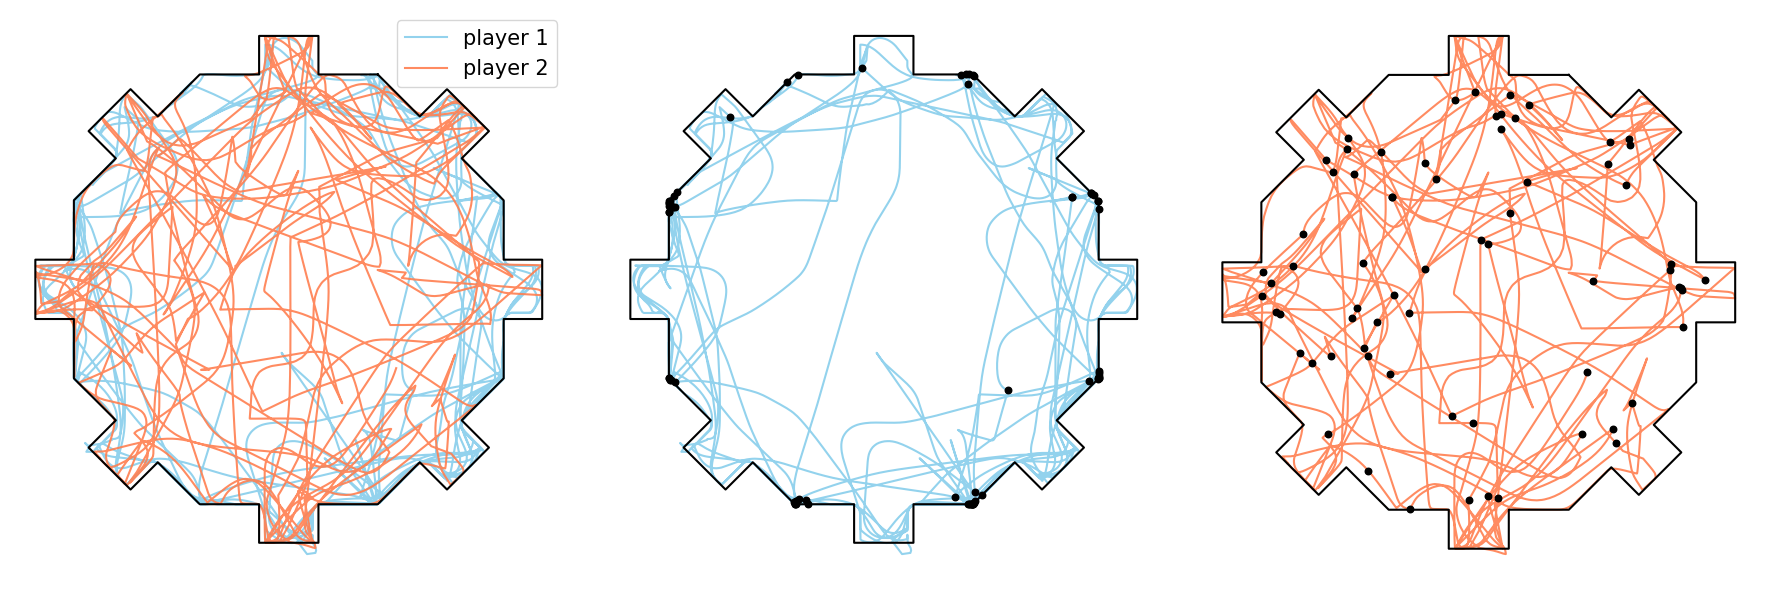

In [273]:
# plot the full session trajectory for player 0, player 1, and combined

fig, axs = plt.subplots(1,3,figsize=(15*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], social_second_half, titles=titles)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], social_second_half, chosen_player=0, titles=titles)
axs[1] = plot_trajectory.mark_session_slice_onsets(axs[1], social_second_half, chosen_player=0, s=22)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

axs[2] = plot_trajectory.plot_session_trajectory(axs[2], social_second_half, chosen_player=1, titles=titles)
axs[2] = plot_octagon.plot_octagon(axs[2])
axs[2] = plot_trajectory.mark_session_slice_onsets(axs[2], social_second_half, chosen_player=1, s=22)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

axs[0].title.set_size(22)
axs[1].title.set_size(22)
axs[2].title.set_size(22)



axs[0].legend(prop={'size': 15})

plt.tight_layout()

plt.show()


### P(High) and Score change throughout

In [202]:
first_half_trials_list = [trial for trial in trials_list_social if trial['data.trialNum'].iloc[0] < 60]
second_half_trials_list = [trial for trial in trials_list_social if trial['data.trialNum'].iloc[0] >= 60]

In [203]:
first_half_p_high_p0 = plot_probability_chose_wall.get_probability_chose_high_social(first_half_trials_list, player_id=0)
first_half_p_high_p1 = plot_probability_chose_wall.get_probability_chose_high_social(first_half_trials_list, player_id=1)

second_half_p_high_p0 = plot_probability_chose_wall.get_probability_chose_high_social(second_half_trials_list, player_id=0)
second_half_p_high_p1 = plot_probability_chose_wall.get_probability_chose_high_social(second_half_trials_list, player_id=1)

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:321: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


In [204]:
first_half_p_high_p1, second_half_p_high_p1

(0.49019607843137253, 0.32786885245901637)

In [330]:
def get_probability_win_social(trial_list, player_id,
                                      inferred_choice=False):

    original_indices = np.arange(len(trial_list))

    # filter for player retrievable choice trials (wins)
    (trial_list_filtered_wins,
     trial_indices_choice_retrievable) = trial_list_filters.filter_trials_retrievable_choice(trial_list,
                                                                           player_id, inferred_choice, original_indices)
    
    # calculate probability of winning in social for this player
    probability_win = plot_probability_chose_wall.calculate_probability_choose_wall(original_indices,
                                                                                            trial_list_filtered_wins)

    return probability_win

In [340]:
def get_probability_chose_high_social(trial_list, player_id,
                                      inferred_choice=False,
                                      given_wall_index=0):


    # filter for player retrievable choice trials
    (trial_list_filtered_choice_retrievable,
     trial_indices_choice_retrievable) = trial_list_filters.filter_trials_retrievable_choice(trial_list,
                                                                           player_id, inferred_choice)
    
    # filter retrievable choice trials for trials where this player chose High
    (trial_list_filtered_chose_high,
    trial_indices_chose_high) = trial_list_filters.filter_trials_player_chose_given_wall(trial_list_filtered_choice_retrievable,
                                                                       player_id,
                                                                       inferred_choice,
                                                                       given_wall_index,
                                                                       original_indices=trial_indices_choice_retrievable)
    
    # calculate probability of choosing High in social for this player
    probability_chose_high = plot_probability_chose_wall.calculate_probability_choose_wall(trial_list_filtered_choice_retrievable, trial_list_filtered_chose_high)

    return probability_chose_high, trial_indices_choice_retrievable,  trial_indices_chose_high

In [277]:
get_probability_win_social(first_half_trials_list, player_id=0), get_probability_win_social(second_half_trials_list, player_id=0)

(0.6440677966101694, 0.6119402985074627)

In [278]:
get_probability_win_social(first_half_trials_list, player_id=1), get_probability_win_social(second_half_trials_list, player_id=1)

(0.3559322033898305, 0.3880597014925373)

#### Bar chart

In [341]:
(p_high_wins_only_first_half_p0, indices_first_half_p0,
  indices_first_half_p0_choice) = get_probability_chose_high_social(first_half_trials_list, player_id=0)
(p_high_wins_only_second_half_p0, indices_second_half_p0,
  indices_second_half_p0_choice) = get_probability_chose_high_social(second_half_trials_list, player_id=0)
p_high_wins_only_first_half_p0, p_high_wins_only_second_half_p0

(0.5263157894736842, 0.43902439024390244)

In [342]:
(p_high_wins_only_first_half_p1, indices_first_half_p1,
  indices_first_half_p1_choice) = get_probability_chose_high_social(first_half_trials_list, player_id=1)
(p_high_wins_only_second_half_p1, indices_second_half_p1,
  indices_second_half_p1_choice) = get_probability_chose_high_social(second_half_trials_list, player_id=1)
p_high_wins_only_first_half_p1, p_high_wins_only_second_half_p1

(0.5714285714285714, 0.5)

In [343]:
(p_high_wins_p0, indices_p0,
  indices_p0_choice) = get_probability_chose_high_social(trials_list_social, player_id=0)

(p_high_wins_p1, indices_p1,
  indices_p1_choice) = get_probability_chose_high_social(trials_list_social, player_id=1)


In [ ]:
(p_high_wins_only_first_half_p1, indices_first_half_p1,
  indices_first_half_p1_choice) = get_probability_chose_high_social(first_half_trials_list, player_id=1)

(array([0.5, 1. , 2. , 2.5]),
 [Text(0.5, 0, 'P0 first half'),
  Text(1.0, 0, 'P0 second half'),
  Text(2.0, 0, 'P1 first half'),
  Text(2.5, 0, 'P1 second half')])

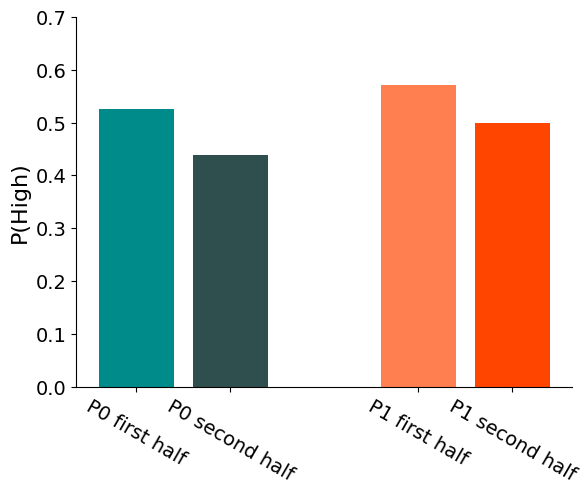

In [324]:
x = np.array([0.5, 1, 2, 2.5])
width = 0.4
vals = np.array([p_high_wins_only_first_half_p0, p_high_wins_only_second_half_p0,
                  p_high_wins_only_first_half_p1, p_high_wins_only_second_half_p1])
tick_labels = ['P0 first half','P0 second half','P1 first half', 'P1 second half']
colors = ['darkcyan', 'darkslategrey', 'coral', 'orangered']
plt.bar(x, vals, width, color=colors, tick_label=tick_labels)
plt.xticks(rotation=-30)

# Hide the right and top spines
plt.gca().spines[['right', 'top']].set_visible(False)
plt.ylabel('P(High)', fontsize=16)
plt.ylim([0.0, 0.7])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)



#### bar chart stats
- two proportion z-test
- Not significant for either player
- 
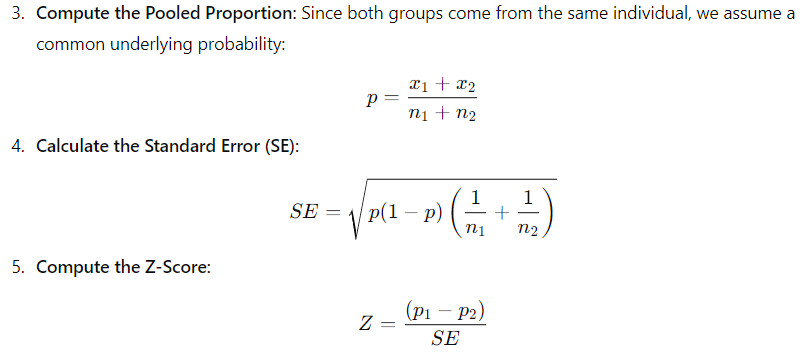

In [348]:
# player0
n1 = np.count_nonzero(indices_first_half_p0)
n2 = np.count_nonzero(indices_second_half_p0)
p = p_high_wins_p0
p1 = p_high_wins_only_first_half_p0
p2 = p_high_wins_only_second_half_p0

std_error = p*(1-p)*((1/n1) + (1/n2))
std_error = np.sqrt(std_error)

zscore = (p1 - p2)/std_error

In [350]:
n1,n2,p,p1,p2,std_error,zscore

(37,
 40,
 0.4810126582278481,
 0.5263157894736842,
 0.43902439024390244,
 np.float64(0.11396490695526515),
 np.float64(0.7659498135162467))

In [352]:
norm.cdf(zscore)

np.float64(0.778146917775464)

In [353]:
# player0
n1 = np.count_nonzero(indices_first_half_p1)
n2 = np.count_nonzero(indices_second_half_p1)
p = p_high_wins_p0
p1 = p_high_wins_only_first_half_p1
p2 = p_high_wins_only_second_half_p1

std_error = p*(1-p)*((1/n1) + (1/n2))
std_error = np.sqrt(std_error)

zscore = (p1 - p2)/std_error

In [354]:
n1,n2,p,p1,p2,std_error,zscore

(21,
 26,
 0.4810126582278481,
 0.5714285714285714,
 0.5,
 np.float64(0.1465916533116064),
 np.float64(0.487262199551958))

In [355]:
norm.cdf(zscore)

np.float64(0.6869637340922257)

#### Line graph

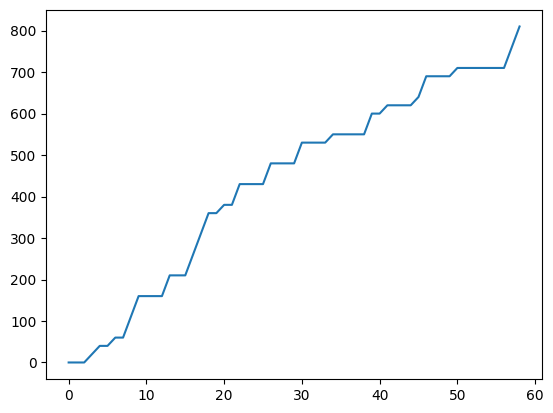

In [ ]:
total_score_unprocessed = social_first_half['data.playerScores.1']
total_score = total_score_unprocessed[~np.isnan(total_score_unprocessed)].values[:60]
total_score_first_half_p1 = total_score
plt.plot(total_score_first_half_p1)

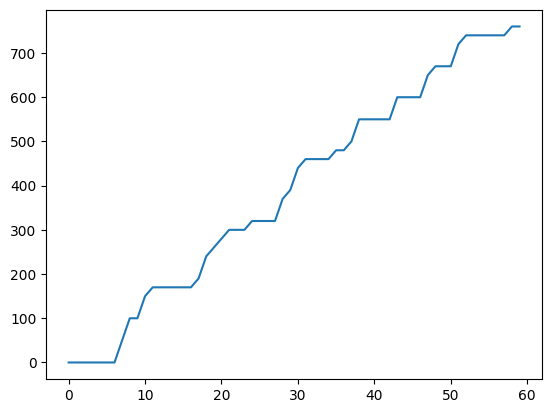

In [210]:
total_score_unprocessed = social_second_half['data.playerScores.1']
total_score = total_score_unprocessed[~np.isnan(total_score_unprocessed)].values[:60]
total_score = total_score - total_score[0]
total_score_second_half_p1 = total_score
plt.plot(total_score_second_half_p1)


In [213]:
total_score_unprocessed[~np.isnan(total_score_unprocessed)].values

array([ 810.,  810.,  810.,  810.,  810.,  810.,  810.,  860.,  910.,
        910.,  960.,  980.,  980.,  980.,  980.,  980.,  980., 1000.,
       1050., 1070., 1090., 1110., 1110., 1110., 1130., 1130., 1130.,
       1130., 1180., 1200., 1250., 1270., 1270., 1270., 1270., 1290.,
       1290., 1310., 1360., 1360., 1360., 1360., 1360., 1410., 1410.,
       1410., 1410., 1460., 1480., 1480., 1480., 1530., 1550., 1550.,
       1550., 1550., 1550., 1550., 1570., 1570., 1570., 1620., 1620.,
       1670., 1670., 1690., 1690.])

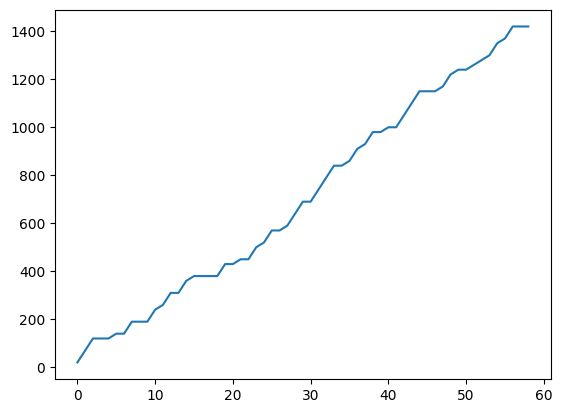

In [214]:
total_score_unprocessed = social_first_half['data.playerScores.0']
total_score = total_score_unprocessed[~np.isnan(total_score_unprocessed)].values[:60]
total_score_first_half_p0 = total_score
plt.plot(total_score_first_half_p0)

In [215]:
total_score_unprocessed = social_second_half['data.playerScores.0']
total_score = total_score_unprocessed[~np.isnan(total_score_unprocessed)].values[:60]
total_score = total_score - total_score[0]
total_score_second_half_p0 = total_score


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

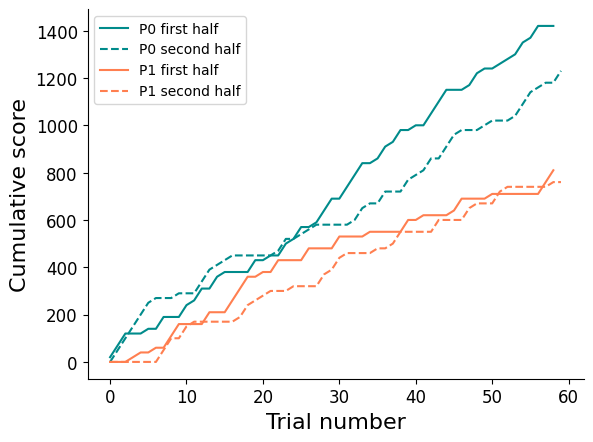

In [326]:
plt.plot(total_score_first_half_p0, color='darkcyan', label='P0 first half')
plt.plot(total_score_second_half_p0, color='darkcyan', linestyle='--', label='P0 second half')
plt.plot(total_score_first_half_p1, color='coral', label='P1 first half')
plt.plot(total_score_second_half_p1, color='coral', linestyle='--', label='P1 second half')

plt.legend()
# Hide the right and top spines
plt.gca().spines[['right', 'top']].set_visible(False)
plt.xlabel('Trial number', fontsize=16)
plt.ylabel('Cumulative score', fontsize=16)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

